## APPROACH

1. Define Problem Statement and Load databases
2. check for size,dimensions,datatypes,missing values
3. Data Analysis with Univariate analysis,Bivariate analysis, multivariate analysis
4. Outlier Analysis 
5. Feature Selection
6. Feature Scaling 
7. Build baseline model and Benchmark Metrics 
8. Try various Algorithms to improve the base model
9. Finalize the model and hypertune the parameters
10. save the model
11. test it using the testdata

Problem Statement -

The loan default dataset has 8 variables and 850 records, each record being loan default status for each customer. Each Applicant was rated as “Defaulted” or “Not-Defaulted”.

New applicants for loan application can also be evaluated on these 8 predictor variables and classified as a default or non-default based on predictor variables.


Number of attributes:

Var. # Variable Description Variable 

Name Type

1.Age:Age of each customer Numerical

2.Education: Education Categorical

3.Employment: Employment status - NumericalCorresponds to job status and being converted to numeric format

4.Address: Geographic area - Numerical Converted to numeric values

5.Income: Gross Income of each Numerical customer

6.Debtinc: Individual’s debt Numerical payment to his or her gross income

7.Creddebt: debt-to-credit ratio is a Numerical measurement of how much you owe your creditors as a percentage of your
available credit (credit limits)

8.Othdebt: Any other debts Numerical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('bank-loan.csv')

In [3]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [6]:
## MISSING VALUE ANALYSIS

In [7]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
## We have 150 missing values in the target column and we will treat it as a test data to predict these values

In [9]:
train=data[0:700]

In [10]:
test=data[700:]

In [11]:
train.shape,test.shape

((700, 9), (150, 9))

In [12]:
train.isnull().sum().sum(),test.isnull().sum().sum()

(0, 150)

In [13]:
train

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987567,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [15]:
train.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [16]:
train.nunique()

age          37
ed            5
employ       32
address      31
income      114
debtinc     231
creddebt    695
othdebt     699
default       2
dtype: int64

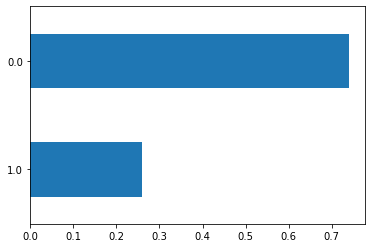

In [17]:
train['default'].value_counts(normalize=True)[::-1].round(2).plot(kind='barh')
plt.savefig('Target distribution')

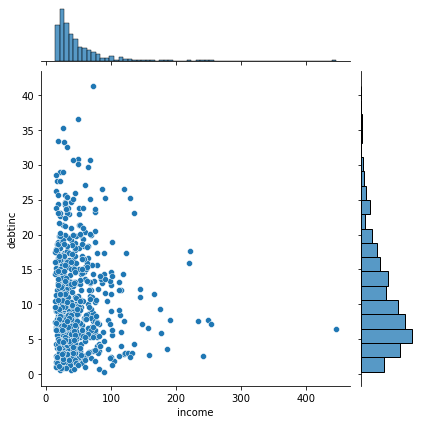

In [18]:
sns.jointplot(x='income',y='debtinc',data=train)
plt.savefig('income vs debtinc')

<AxesSubplot:xlabel='employ', ylabel='count'>

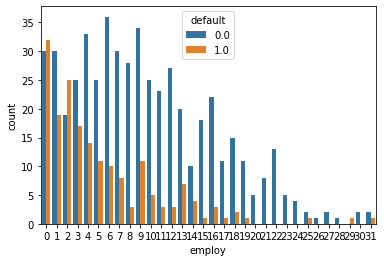

In [19]:
sns.countplot(x='employ',hue='default',data=train)

In [20]:
## WE can see that come employment status like 20,21,22,23,24,27,28 have only defaulters and employment 0,1,2 has highest non-defaulters 

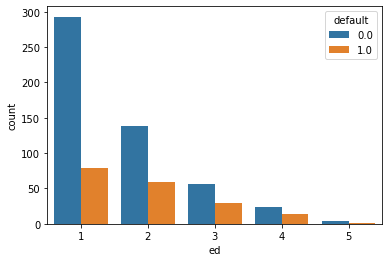

In [21]:
sns.countplot(x='ed',hue='default',data=train)
plt.savefig('Count plot of ed')

In [22]:
train=train[~(train['ed']==5)]

In [23]:
train[['ed','default']].value_counts()

ed  default
1   0.0        293
2   0.0        139
1   1.0         79
2   1.0         59
3   0.0         57
    1.0         30
4   0.0         24
    1.0         14
dtype: int64

In [24]:
non_defaulter_percentage=[]
non_defaulter_percentage=pd.Series(non_defaulter_percentage)

C:\Users\Madhu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [25]:
non_defaulter_percentage['ed_1']=79/(293+79)
non_defaulter_percentage['ed_2']=59/(139+59)
non_defaulter_percentage['ed_3']=30/(57+30)
non_defaulter_percentage['ed_4']=14/(24+14)
non_defaulter_percentage['ed_5']=1/(4+1)

<AxesSubplot:>

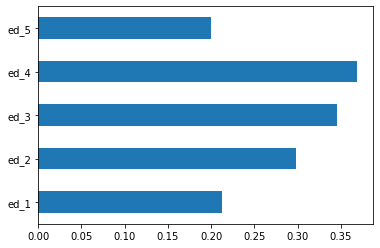

In [26]:
non_defaulter_percentage.plot(kind='barh')

In [27]:
## We can clearly see that people with education category as 1 has most defaulters 
# followed by education category 2 we have less defaulters in education category 3 and 4

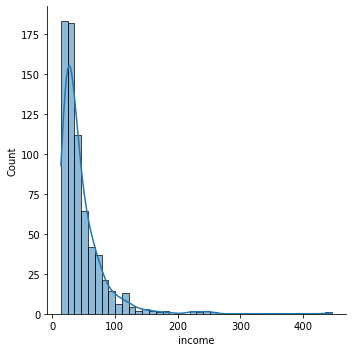

In [28]:
sns.displot(x=train['income'],bins=40,kde=True)

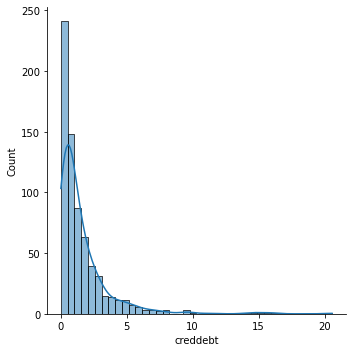

In [29]:
sns.displot(x=train['creddebt'],bins=40,kde=True)

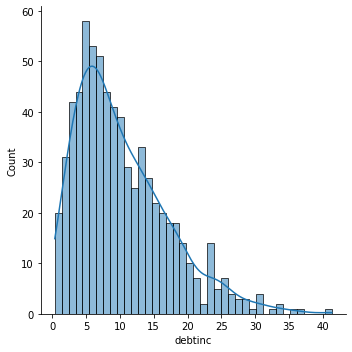

In [30]:
sns.displot(x=train['debtinc'],bins=40,kde=True)

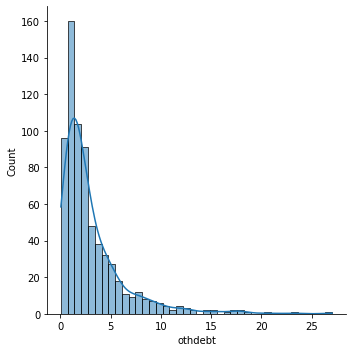

In [31]:
sns.displot(x=train['othdebt'],bins=40,kde=True)

In [32]:
num_cols=['age','income','debtinc','creddebt','othdebt']

In [33]:
cat_cols=['ed','employ','address']

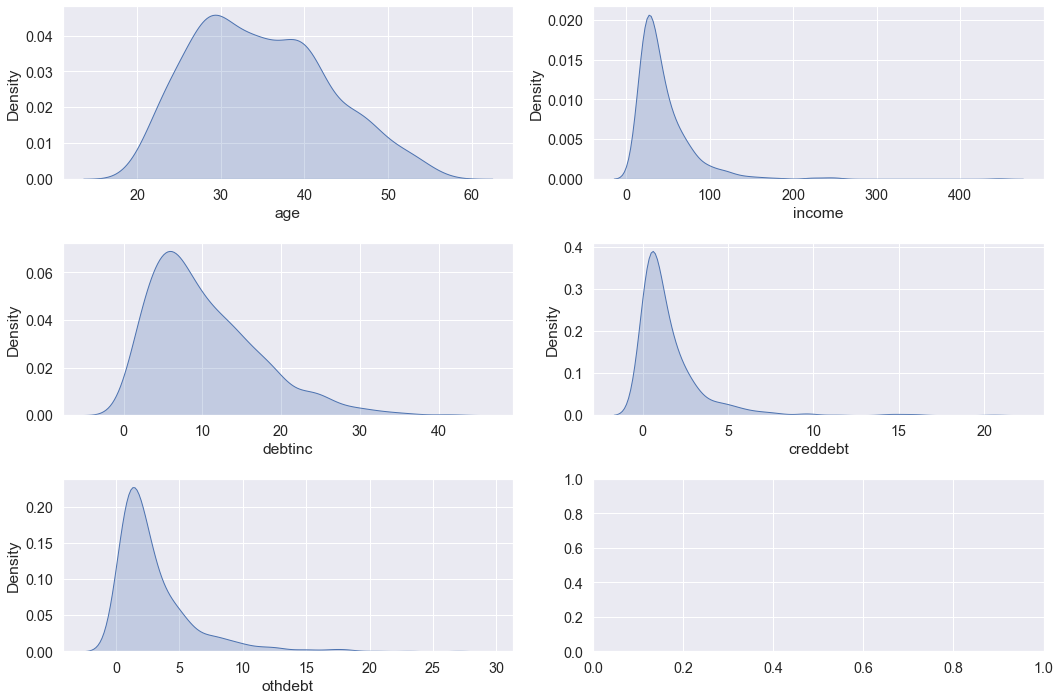

In [34]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()
plt.savefig('distribution plot.jpeg')

In [35]:
## We See that the income,debtinc,creddebt,othdebt are all right skewed
## We will remove the outliers
## We will standardize the data it will bring the distribution to normal distribution

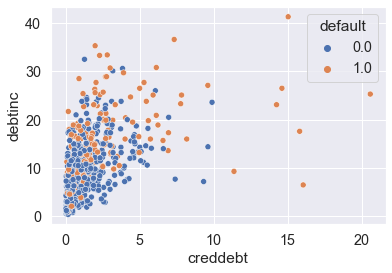

In [36]:
sns.scatterplot(x='creddebt',y='debtinc',hue='default',data=train)
plt.savefig('debtinc vs credebt')

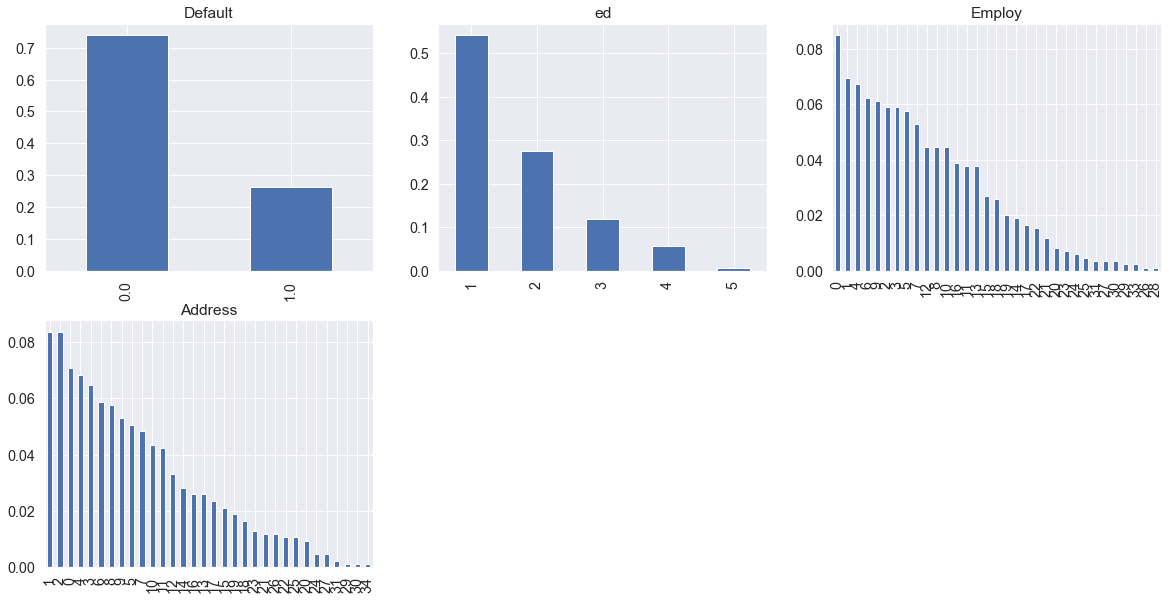

<Figure size 432x288 with 0 Axes>

In [37]:
plt.subplot(231)
data['default'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Default')

plt.subplot(232)
data['ed'].value_counts(normalize=True).plot.bar(title= 'ed')

plt.subplot(233)
data['employ'].value_counts(normalize=True).plot.bar(title= 'Employ')

plt.subplot(234)
data['address'].value_counts(normalize=True).plot.bar(title= 'Address')

plt.show()
plt.savefig('Categorical feature plots')

## We can clearly differenciate that when credebt is more than 10 we have no defaulters and when debtinc is morethan 20 We have more non defaulters than defaulters

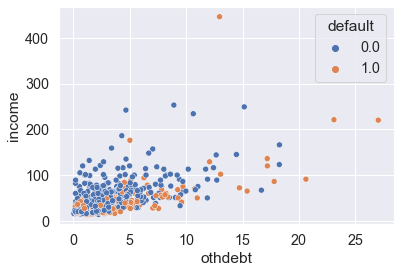

In [38]:
sns.scatterplot(x='othdebt',y='income',hue='default',data=train)
plt.savefig('scatterplot of income vs othdebt')

<Figure size 864x864 with 0 Axes>

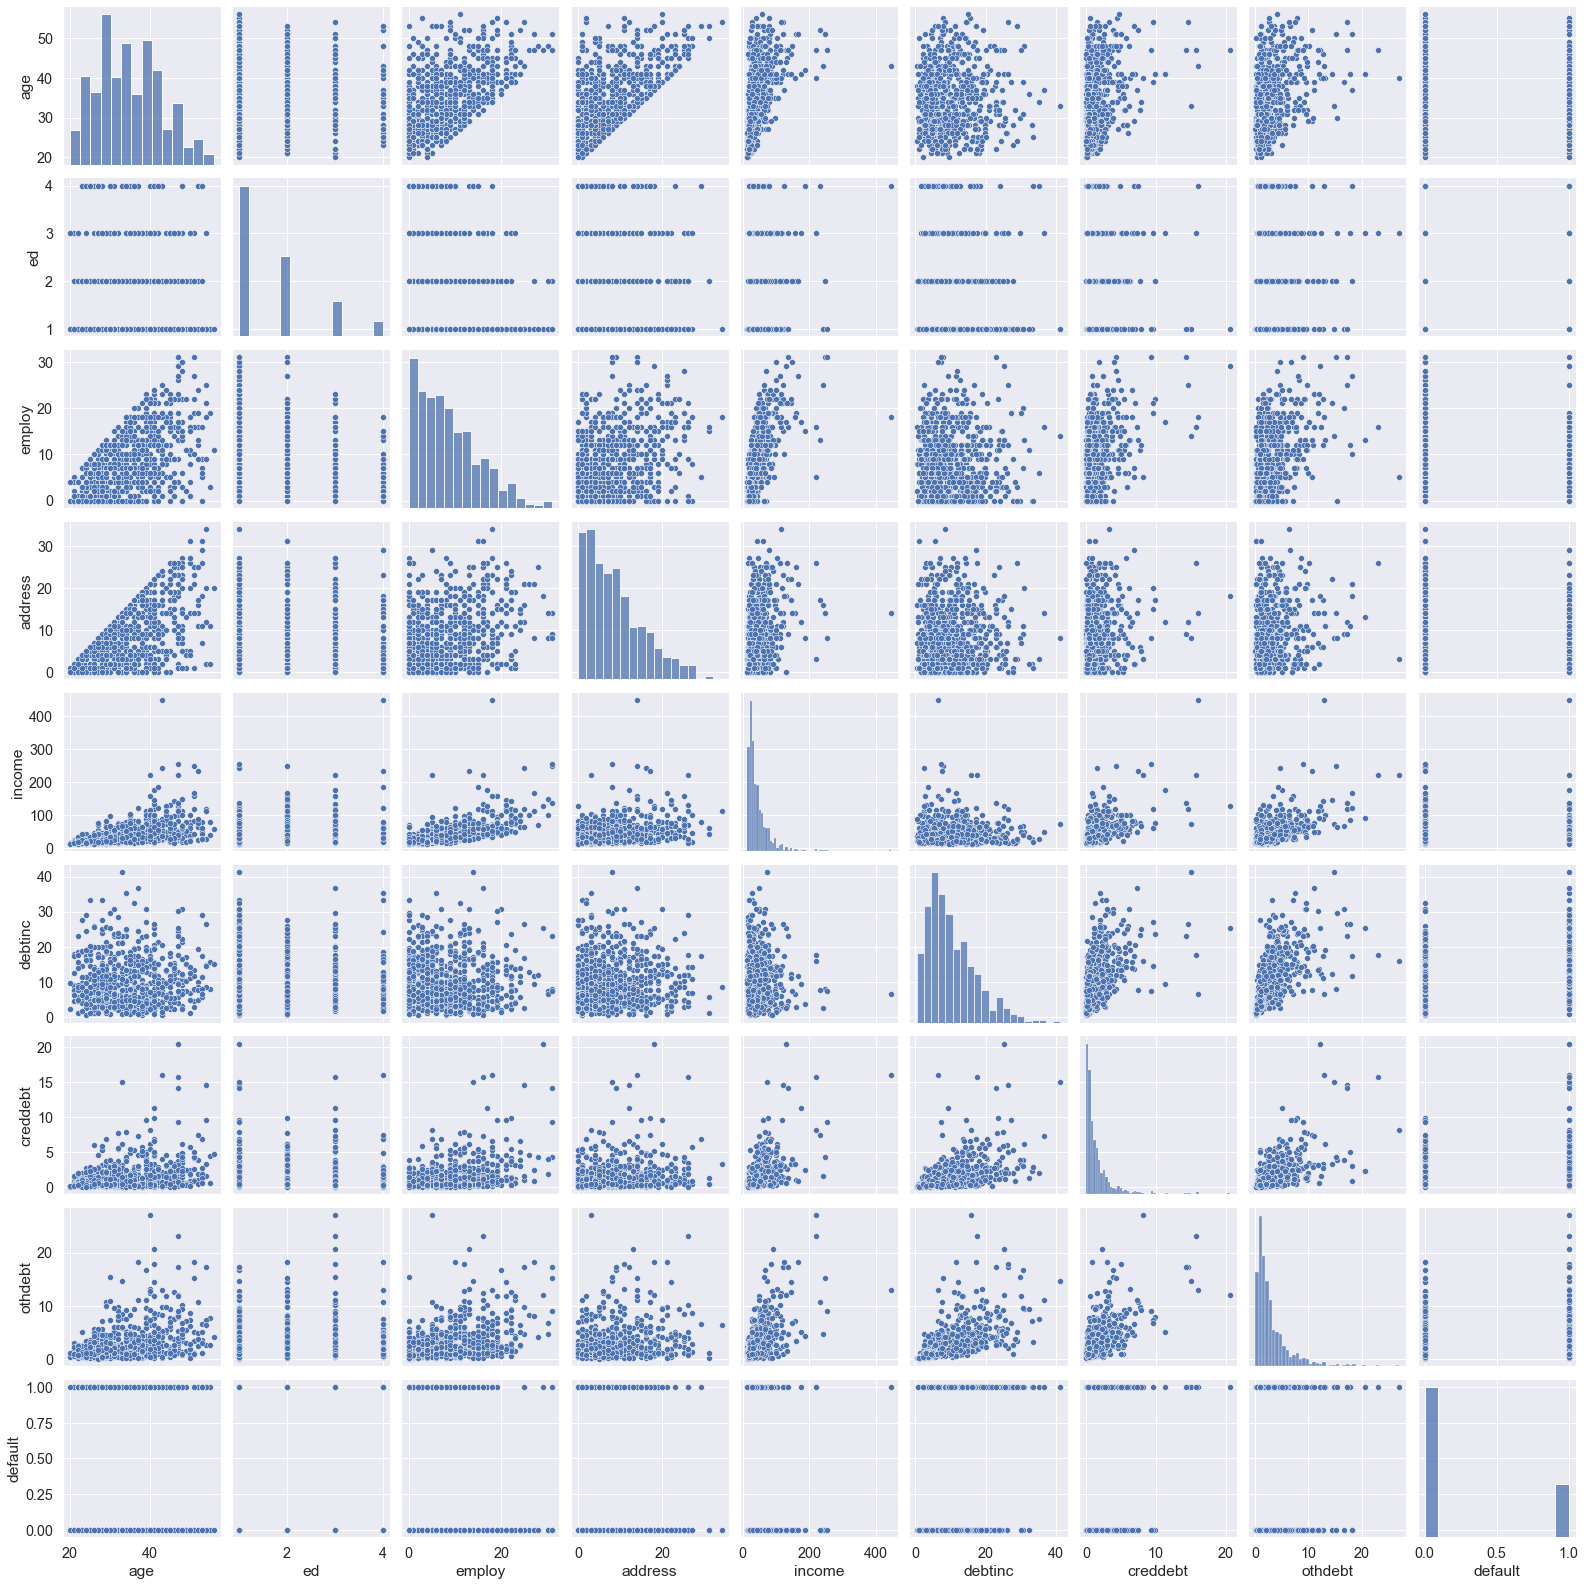

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(12,12))
sns.pairplot(data=train)
plt.show()
plt.savefig('pairplot')

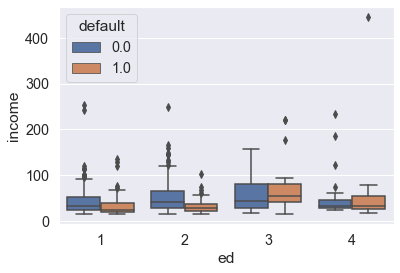

In [40]:
sns.boxplot(x='ed',y='income',hue='default',data=train)
plt.savefig('box plot')

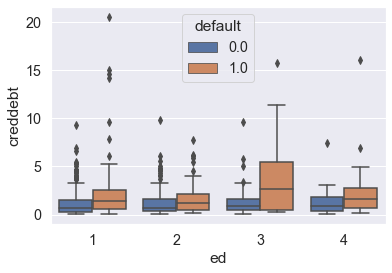

In [41]:
sns.boxplot(x='ed',y='creddebt',hue='default',data=train)
plt.savefig('boxplot2')

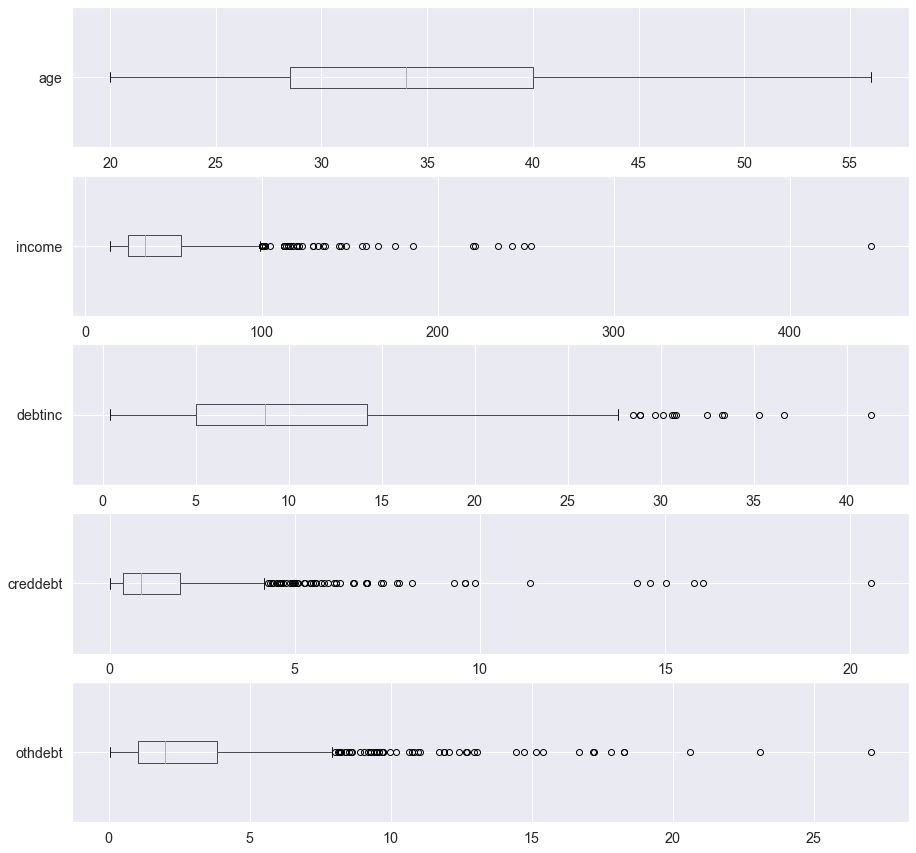

In [42]:
fig, axes = plt.subplots(5, 1, figsize=(15, 15))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)
plt.savefig('boxplot before outlier treatment.jpeg')


In [43]:
cat_cols=['ed','employ','address']

In [44]:
def outliers(df,columns):
    for i in columns:
        quantile_1,quantile_3=np.percentile(df[i],[25,75])
        quantile_f,quantile_l=np.percentile(df[i],[1,99])
        
        IQR=quantile_3 - quantile_1
        
        lower_bound= quantile_1 - 1.5 * IQR
        upper_bound= quantile_3 + 1.5 * IQR
        
        print(i,quantile_1,quantile_3,lower_bound,upper_bound)
        
        df[i].loc[df[i] < lower_bound]=lower_bound
        df[i].loc[df[i]> upper_bound]=upper_bound

In [45]:
outliers(train,num_cols)

age 28.5 40.0 11.25 57.25
income 24.0 54.0 -21.0 99.0
debtinc 5.0 14.2 -8.799999999999999 28.0
creddebt 0.367251 1.9066079999999999 -1.9417844999999998 4.2156435
othdebt 1.0430605 3.8316540000000003 -3.1398297499999996 8.01454425


C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Madhu\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(in

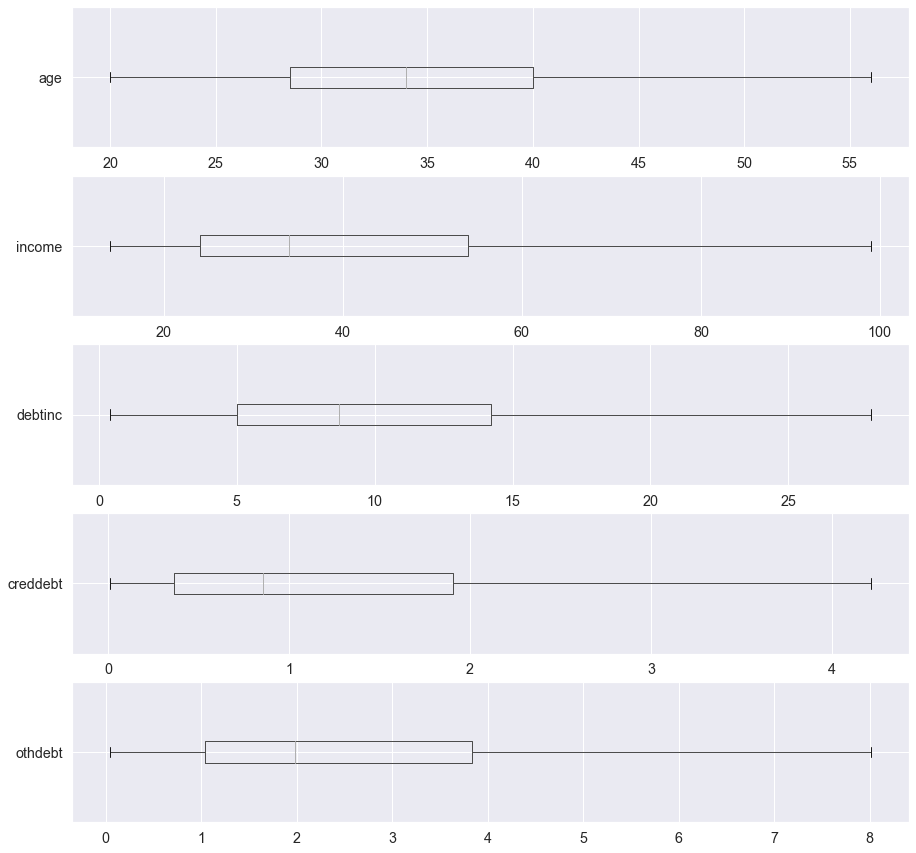

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(15, 15))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)
#plt.savefig('boxplot before outlier treatment.jpeg')

In [47]:
corr=train[num_cols].corr()

In [48]:
corr

,age,income,debtinc,creddebt,othdebt
age,1.000000,0.560220,0.021548,0.328090,0.369258
income,0.560220,1.000000,-0.002957,0.553126,0.596942
debtinc,0.021548,-0.002957,1.000000,0.587372,0.669999
creddebt,0.328090,0.553126,0.587372,1.000000,0.657787
othdebt,0.369258,0.596942,0.669999,0.657787,1.000000


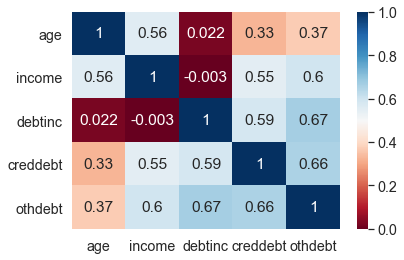

In [49]:
sns.heatmap(corr,cmap='RdBu',annot=True)
plt.savefig('Correlation plot')

In [50]:
## We see that othdebt is moderately correlated with all the other variables we will remove this variable

In [51]:
train=train.drop('othdebt',1)

In [52]:
## We will do chi squared test of independence to check if the columns are independent or not 
## null hypothesis is that they are independent.

In [53]:
from scipy.stats import chi2_contingency

In [54]:
for i in cat_cols:
    print(i)
    chi,p,dof,ex=chi2_contingency(pd.crosstab(train['default'],train[i]))
    print(p)

ed
0.009832076351244933
employ
1.985975866231832e-08
address
0.0003137856876487326


In [55]:
## We can see that all the values are less than the aplha which is 0.05 we can say that all the columns are independent 
## so we fail to reject the null hypothesis

In [56]:
num_cols=['age','income','creddebt','debtinc','employ','address']

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
train[num_cols]=scaler.fit_transform(train[num_cols])

In [60]:
train=pd.get_dummies(train,columns=['ed'],drop_first=True)

In [61]:
train

,age,employ,address,income,debtinc,creddebt,default,ed_2,ed_3,ed_4
0,0.776651,1.291411,0.549349,2.396634,-0.137083,2.325319,1.0,0,1,0
1,-0.978299,0.242018,-0.333080,-0.466049,1.080460,0.030122,0.0,0,0,0
2,0.651298,0.991584,0.843492,0.544310,-0.715416,-0.376987,0.0,0,0,0
3,0.776651,0.991584,0.843492,2.396634,-1.111118,1.072990,0.0,0,0,0
4,-1.354360,-0.957288,-1.215508,-0.592344,1.080460,0.372164,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
695,0.149883,-0.357635,0.990563,-0.634442,-0.852390,-0.854788,1.0,1,0,0
696,-0.727592,-0.357635,-0.627223,-0.887032,0.197741,-0.768373,0.0,1,0,0
697,-0.226178,0.991584,-0.774294,-0.423951,-0.395811,-0.670427,0.0,0,0,0
698,1.278066,1.591237,2.020063,1.470472,-0.274057,0.786548,0.0,0,0,0


In [62]:
y=train['default']
X=train.drop('default',1)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y,random_state=1)

In [65]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0.0    0.737634
 1.0    0.262366
 Name: default, dtype: float64,
 0.0    0.73913
 1.0    0.26087
 Name: default, dtype: float64)

#### Since the target variable is imbalanced we are making sure that both y_train,y_test have similar percentage of defaulters and non defaulters
we can try out things like Repeated Stratified K fold, Smote, decile analysis, gain curve etc.. to get the desired results 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model=LogisticRegression()

In [68]:
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
pred=model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [71]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.8304347826086956
F1_score: 0.6285714285714286
Confusion Matrix: [[158  12]
 [ 27  33]]


In [72]:
y_pred=model.predict_proba(X_test)

In [73]:
# pip install scikitplot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

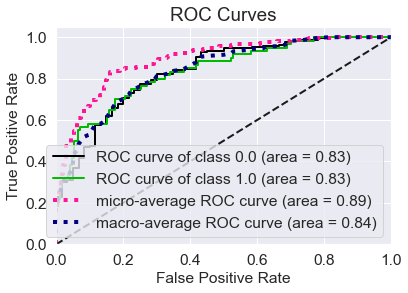

In [74]:
from scikitplot.metrics import plot_roc
fig, ax = plt.subplots()
plot_roc(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

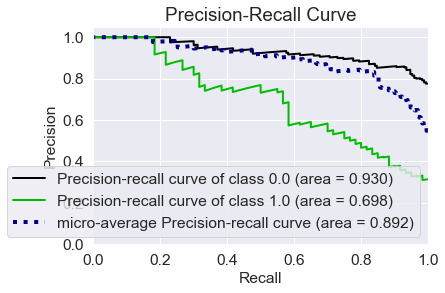

In [75]:
from scikitplot.metrics import plot_precision_recall
fig, ax = plt.subplots()
plot_precision_recall(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

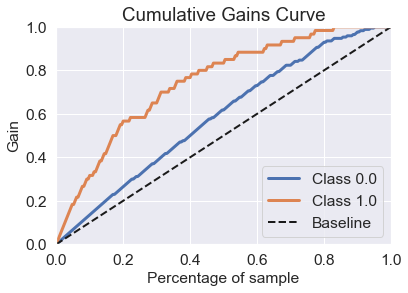

In [76]:
from scikitplot.metrics import plot_cumulative_gain
fig, ax = plt.subplots()
plot_cumulative_gain(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

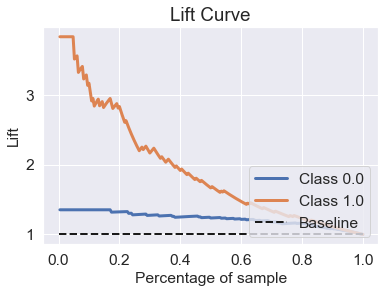

In [77]:
from scikitplot.metrics import plot_lift_curve
fig, ax = plt.subplots()
plot_lift_curve(y_test, y_pred,ax=ax,figsize=(10,10))

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

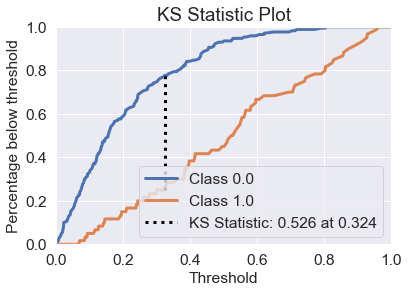

In [78]:
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(y_test,y_pred)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtc=DecisionTreeClassifier()

In [81]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
pred=dtc.predict(X_test)

In [83]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.6956521739130435
F1_score: 0.47761194029850745
Confusion Matrix: [[128  42]
 [ 28  32]]


In [84]:
y_pred=dtc.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

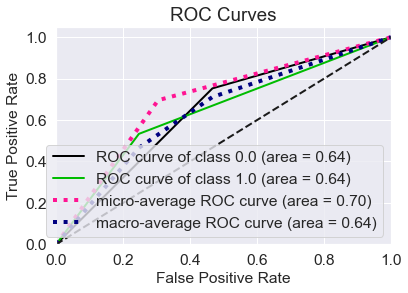

In [85]:
from scikitplot.metrics import plot_roc
fig, ax = plt.subplots()
plot_roc(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

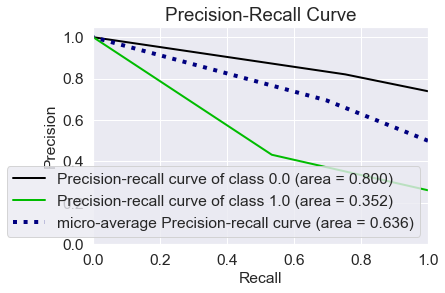

In [86]:
from scikitplot.metrics import plot_precision_recall
fig, ax = plt.subplots()
plot_precision_recall(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

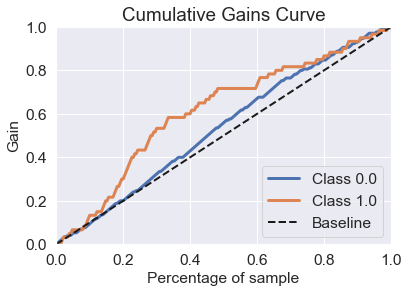

In [87]:
from scikitplot.metrics import plot_cumulative_gain
fig, ax = plt.subplots()
plot_cumulative_gain(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

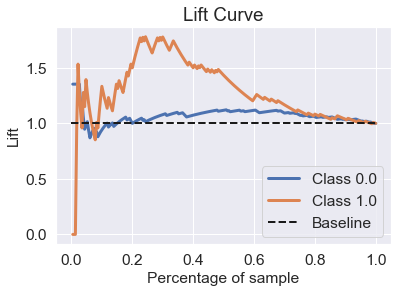

In [88]:
from scikitplot.metrics import plot_lift_curve
fig, ax = plt.subplots()
plot_lift_curve(y_test, y_pred,ax=ax,figsize=(10,10))

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

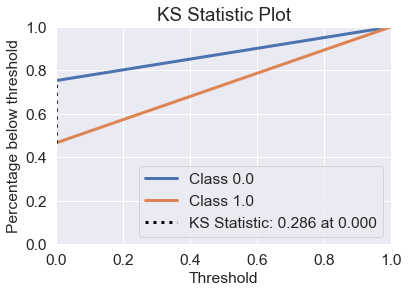

In [89]:
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(y_test,y_pred)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc=RandomForestClassifier(n_estimators=400)

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [93]:
pred=rfc.predict(X_test)

In [94]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.7956521739130434
F1_score: 0.5765765765765766
Confusion Matrix: [[151  19]
 [ 28  32]]


In [95]:
y_pred=rfc.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

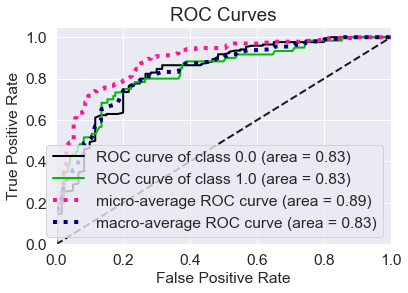

In [96]:
from scikitplot.metrics import plot_roc
fig, ax = plt.subplots()
plot_roc(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

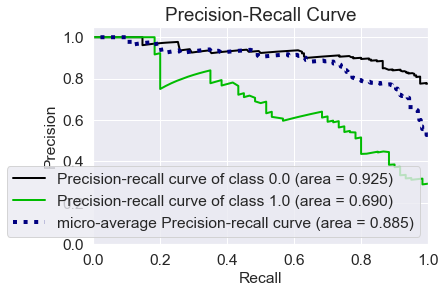

In [97]:
from scikitplot.metrics import plot_precision_recall
fig, ax = plt.subplots()
plot_precision_recall(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

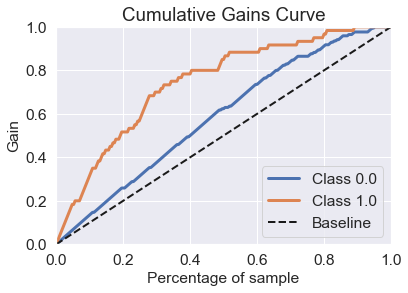

In [98]:
from scikitplot.metrics import plot_cumulative_gain
fig, ax = plt.subplots()
plot_cumulative_gain(y_test, y_pred, ax=ax)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

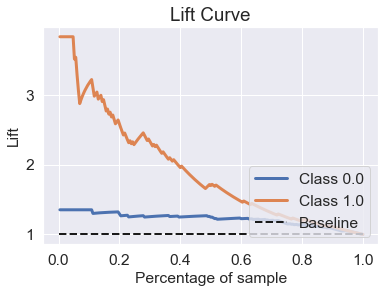

In [99]:
from scikitplot.metrics import plot_lift_curve
fig, ax = plt.subplots()
plot_lift_curve(y_test, y_pred,ax=ax,figsize=(10,10))

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

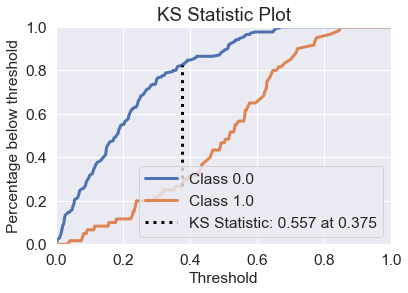

In [100]:
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(y_test,y_pred)

In [101]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [102]:
fold=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

In [103]:
score=cross_val_score(model,X,y,scoring='f1',cv=fold,n_jobs=-1)

In [104]:
print(np.mean(score))

0.5393970859694512


In [105]:
score=cross_val_score(rfc,X,y,scoring='f1',cv=fold,n_jobs=-1)

In [106]:
print(np.mean(score))

0.5111253394683837


In [107]:
from xgboost import XGBClassifier

In [108]:
xg=XGBClassifier()

In [109]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
pred=xg.predict(X_test)

In [111]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.7695652173913043
F1_score: 0.5309734513274337
Confusion Matrix: [[147  23]
 [ 30  30]]


In [112]:
eval_set = [(X_test, y_test)]
xg.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.74623
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.78980
[2]	validation_0-auc:0.80338
[3]	validation_0-auc:0.81010
[4]	validation_0-auc:0.82716
[5]	validation_0-auc:0.83069
[6]	validation_0-auc:0.82559
[7]	validation_0-auc:0.82451
[8]	validation_0-auc:0.82779
[9]	validation_0-auc:0.82549
[10]	validation_0-auc:0.82873
[11]	validation_0-auc:0.82549
[12]	validation_0-auc:0.82412
[13]	validation_0-auc:0.82108
[14]	validation_0-auc:0.81755
[15]	validation_0-auc:0.81745
Stopping. Best iteration:
[5]	validation_0-auc:0.83069



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
from imblearn.over_sampling import RandomOverSampler

In [114]:
ros=RandomOverSampler(random_state=1)

In [115]:
x_ros,y_ros=ros.fit_resample(X,y)

In [116]:
X_train,X_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.3,random_state=1)

In [117]:
model=LogisticRegression()

In [118]:
model.fit(X_train,y_train)

LogisticRegression()

In [119]:
pred=model.predict(X_test)

In [120]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.7435064935064936
F1_score: 0.7392739273927393
Confusion Matrix: [[117  36]
 [ 43 112]]


In [121]:
rfc=RandomForestClassifier(n_estimators=300,random_state=1)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [123]:
pred=rfc.predict(X_test)

In [124]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.8766233766233766
F1_score: 0.8774193548387098
Confusion Matrix: [[134  19]
 [ 19 136]]


In [125]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
pred2=xg.predict(X_test)

In [127]:
print('Accuracy_score:',(accuracy_score(y_test,pred)))
print('F1_score:',(f1_score(y_test,pred)))
print('Confusion Matrix:',(confusion_matrix(y_test,pred)))

Accuracy_score: 0.8766233766233766
F1_score: 0.8774193548387098
Confusion Matrix: [[134  19]
 [ 19 136]]


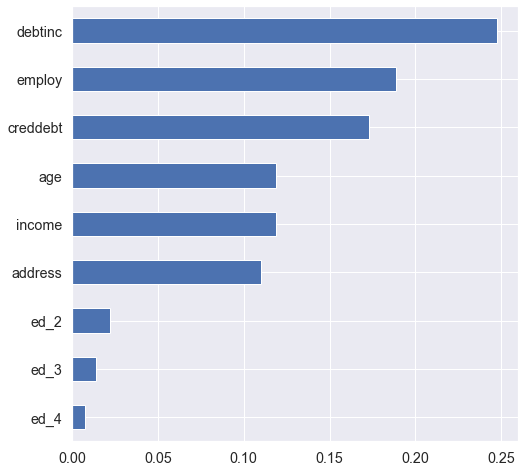

In [128]:
feat=pd.Series(rfc.feature_importances_,index=X.columns)
feat.sort_values(ascending=False)[::-1].plot(kind='barh',figsize=(8,8))
plt.savefig('Feature importance plot')

In [129]:
y_pred=rfc.predict_proba(X_test)

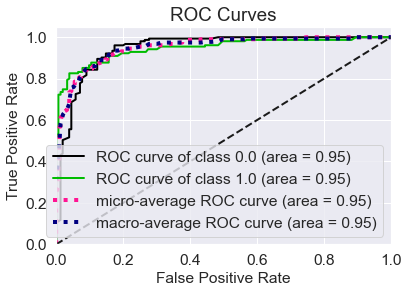

In [130]:
from scikitplot.metrics import plot_roc
fig, ax = plt.subplots()
plot_roc(y_test, y_pred, ax=ax)
plt.savefig('Roc-curve')

In [131]:
y_pred=rfc.predict_proba(X_test)

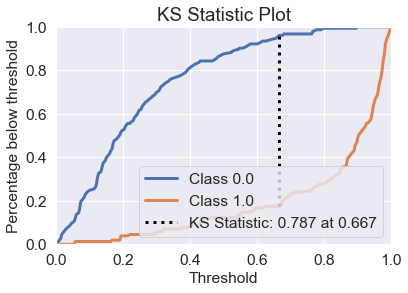

In [132]:
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(y_test,y_pred)
plt.savefig('KS statistic')

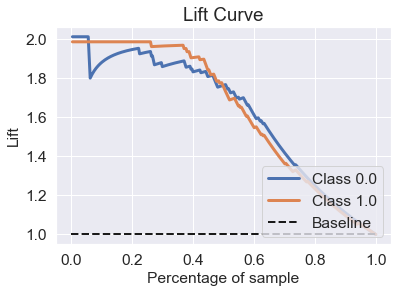

In [133]:
from scikitplot.metrics import plot_lift_curve
fig, ax = plt.subplots()
plot_lift_curve(y_test, y_pred,ax=ax,figsize=(10,10))
plt.savefig('Lift curve')

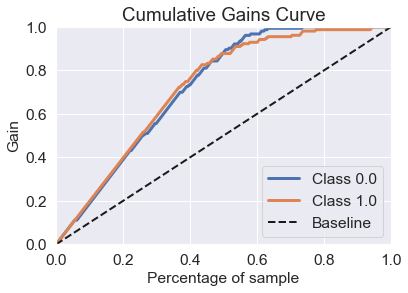

In [134]:
from scikitplot.metrics import plot_cumulative_gain
fig, ax = plt.subplots()
plot_cumulative_gain(y_test, y_pred, ax=ax)
plt.savefig('Gain Curve')

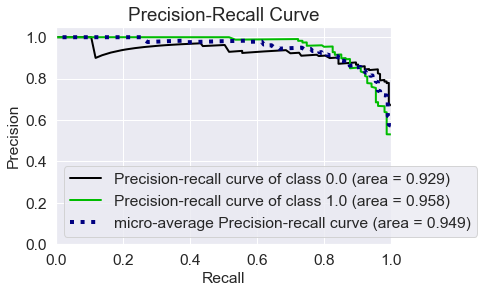

In [135]:
from scikitplot.metrics import plot_precision_recall
fig, ax = plt.subplots()
plot_precision_recall(y_test, y_pred, ax=ax)
plt.savefig('Precision - Recall Curve')

In [136]:
## Test Data Preprocessing 

In [137]:
import pickle

In [138]:
pkl_filename = "xg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

In [139]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [140]:
test=test.drop(['default','othdebt'],1)

In [141]:
outliers(test,['age','income','creddebt','debtinc'])

age 29.25 43.0 8.625 63.625
income 25.25 61.75 -29.5 116.5
creddebt 0.533265 1.8982350000000001 -1.5141900000000001 3.9456900000000004
debtinc 5.4 12.9 -5.85 24.15


C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [142]:
test.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
dtype: int64

In [143]:
test['age']=test['age'].astype(int)

In [144]:
test[num_cols]=scaler.fit_transform(test[num_cols])

In [145]:
test=pd.get_dummies(test,columns=['ed'],drop_first=True)

In [146]:
test['y_pred']=pickle_model.predict_proba(test)[:,1]

In [147]:
## At Threshold value 0.66 model is able to  

In [148]:
test['default']=test['y_pred'].map(lambda x: 1 if x > 0.66 else 0 )

In [149]:
test['default'].value_counts()

0    129
1     21
Name: default, dtype: int64